# DataSet Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.
Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 
# 1. Problem Statement: 

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading DataSet

In [4]:
Rainfall_DF = pd.read_csv('weatherAUS.csv')
Rainfall_DF.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Checking some basic operation like Shape,Data Types, Relation and Statistics

In [5]:
Rainfall_DF.shape

(8425, 23)

In [6]:
Rainfall_DF.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
Rainfall_DF.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

In [8]:
Rainfall_DF.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

# Handling missing values

Here we will manage values with mean and we will take mean with reference to location for better handling

In [9]:
Rainfall_DF['MinTemp']=Rainfall_DF.groupby('Location').MinTemp.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['MaxTemp']=Rainfall_DF.groupby('Location').MaxTemp.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Rainfall']=Rainfall_DF.groupby('Location').Rainfall.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Sunshine']=Rainfall_DF.groupby('Location').Sunshine.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['WindSpeed3pm']=Rainfall_DF.groupby('Location').WindSpeed3pm.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Pressure9am']=Rainfall_DF.groupby('Location').Pressure9am.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Pressure3pm']=Rainfall_DF.groupby('Location').Pressure3pm.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Cloud9am']=Rainfall_DF.groupby('Location').Cloud9am.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Cloud3pm']=Rainfall_DF.groupby('Location').Cloud3pm.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Temp9am']=Rainfall_DF.groupby('Location').Temp9am.transform(lambda x: x.fillna(x.mean()))
Rainfall_DF['Temp3pm']=Rainfall_DF.groupby('Location').Temp3pm.transform(lambda x: x.fillna(x.mean()))

In [10]:
col_means = Rainfall_DF['Evaporation'].mean()
Rainfall_DF['Evaporation'] = Rainfall_DF['Evaporation'].fillna(col_means)

col_means = Rainfall_DF['Sunshine'].mean()
Rainfall_DF['Sunshine'] = Rainfall_DF['Sunshine'].fillna(col_means)

col_means = Rainfall_DF['WindGustSpeed'].mean()
Rainfall_DF['WindGustSpeed'] = Rainfall_DF['WindGustSpeed'].fillna(col_means)

col_means = Rainfall_DF['WindSpeed9am'].mean()
Rainfall_DF['WindSpeed9am'] = Rainfall_DF['WindSpeed9am'].fillna(col_means)

col_means = Rainfall_DF['Humidity9am'].mean()
Rainfall_DF['Humidity9am'] = Rainfall_DF['Humidity9am'].fillna(col_means)

col_means = Rainfall_DF['Humidity3pm'].mean()
Rainfall_DF['Humidity3pm'] = Rainfall_DF['Humidity3pm'].fillna(col_means)

col_means = Rainfall_DF['Pressure9am'].mean()
Rainfall_DF['Pressure9am'] = Rainfall_DF['Pressure9am'].fillna(col_means)

col_means = Rainfall_DF['Pressure3pm'].mean()
Rainfall_DF['Pressure3pm'] = Rainfall_DF['Pressure3pm'].fillna(col_means)

col_means = Rainfall_DF['Cloud3pm'].mean()
Rainfall_DF['Cloud3pm'] = Rainfall_DF['Cloud3pm'].fillna(col_means)

col_means = Rainfall_DF['Cloud9am'].mean()
Rainfall_DF['Cloud9am'] = Rainfall_DF['Cloud9am'].fillna(col_means)

In [11]:
Rainfall_DF['WindGustDir'] = Rainfall_DF['WindGustDir'].fillna(Rainfall_DF['WindGustDir'].mode()[0])
Rainfall_DF['WindDir9am'] = Rainfall_DF['WindDir9am'].fillna(Rainfall_DF['WindDir9am'].mode()[0])
Rainfall_DF['WindDir3pm'] = Rainfall_DF['WindDir3pm'].fillna(Rainfall_DF['WindDir3pm'].mode()[0])
Rainfall_DF['RainToday'] = Rainfall_DF['RainToday'].fillna(Rainfall_DF['RainToday'].mode()[0])
Rainfall_DF['RainTomorrow'] = Rainfall_DF['RainTomorrow'].fillna(Rainfall_DF['RainTomorrow'].mode()[0])

In [12]:
# Checking null values

Rainfall_DF.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

In [13]:
# Checking Statisticals dataset

Rainfall_DF.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000
mean,13.192250,23.856691,2.805574,5.389395,7.775937,40.174469,13.847646,18.470434,67.822496,51.249790,1017.640209,1015.236740,4.871231,4.679395,17.760558,22.439764
std,5.380609,6.114888,10.309936,3.852004,2.835614,13.776101,10.128579,9.728916,16.774231,18.311894,6.275790,6.217494,2.500634,2.323315,5.608611,5.946315
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.300000,19.300000,0.000000,4.000000,7.775937,31.000000,6.000000,11.000000,56.000000,39.000000,1014.000000,1011.400000,3.000000,3.000000,13.800000,18.100000
50%,13.200000,23.300000,0.000000,5.389395,7.775937,40.174469,13.000000,19.000000,68.000000,51.000000,1017.640209,1015.236740,5.776316,5.154047,17.700000,22.000000
75%,17.300000,28.000000,1.400000,5.389395,8.900000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.800000,7.000000,7.000000,21.900000,26.300000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [14]:
categorical_data =[k for k in Rainfall_DF if Rainfall_DF[k].dtype == 'object']

for i in categorical_data:
    columns = Rainfall_DF[i].unique()
    print(i,columns)

Date ['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']
Location ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']
WindGustDir ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
WindDir9am ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
WindDir3pm ['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']
RainToday ['No' 'Yes']
RainTomorrow ['No' 'Yes']


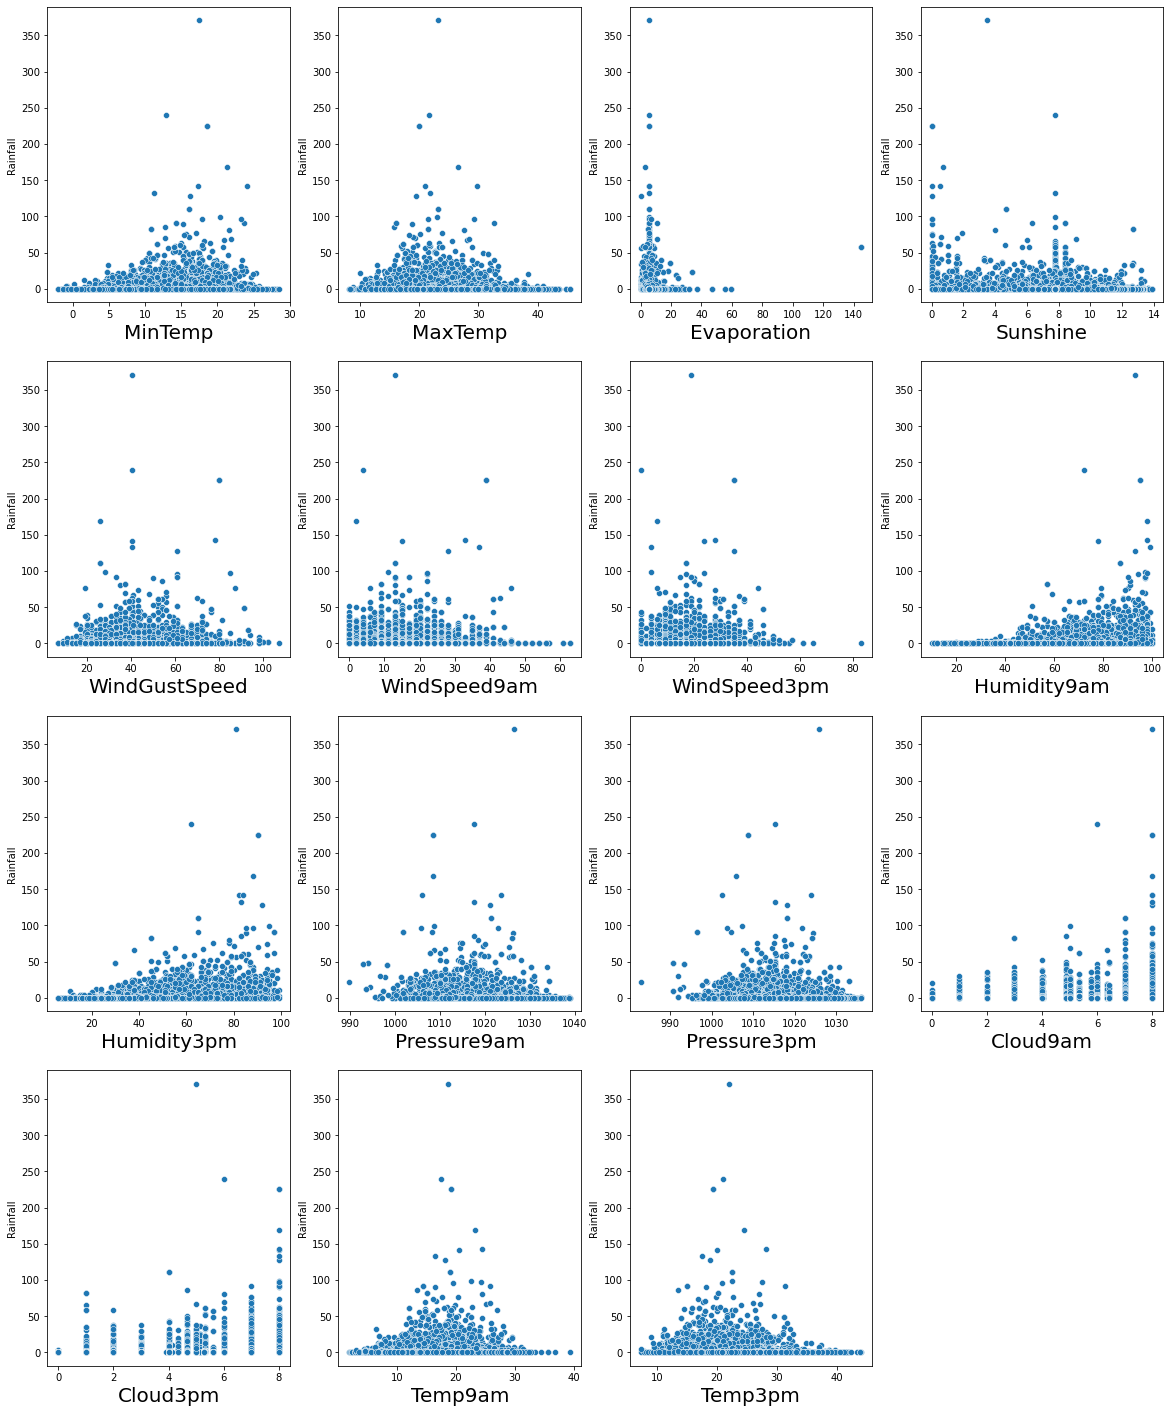

In [15]:
plt.figure(figsize=(20,25),facecolor='white')
plotnum=1

y = Rainfall_DF['Rainfall']
for col in Rainfall_DF[['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']]:
    if plotnum<=24:
        plt.subplot(4,4,plotnum)
        sns.scatterplot(Rainfall_DF[col],y)
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

# Observation:

MinTemp - Range of temp 10-23 more chances for Rainfall.

MacTemp - Here we can also visulise that Rainfall temp range is 15-30.

Evaporation - It is clearly showing 0-18 range leads to highly chances for Rainfall.

SunShine - Sunshine is not looking good for Rainfall.

WindGustSpeed - When windgust speed between 25-50 highly chance for Rainfall.

Windspeed9am - It is clearly showing if windspeed slow then it is highly chance for Rainfall in the morning.

WindSpeed3pm - When wind speed increase then there will be chance of rain going to decrease, so in this case we found negative corelationship.

Humidity9am - When humidity increase from 60+ then there will be highly chance for Rainfall.

Humidity3pm - Here we can mark that lower humidity have also chances for rain like 30-40 which is less possible in morning time.

Pressure9am - For Rainfall required Low Pressure and here we can see pressure is 1000-1030 and it is more sutable for Rainfall.

Pressure3pm - For Rainfall required Low Pressure and here we can see pressure is 1000-1030 and it is more sutable for Rainfall.

Cloud9am, Cloud3pm  - More cloudy means more rainfall.

Temp9am,Temp3pm - It is common that temp. should be low for high rainfall nearly 10-25. 

# checking Unique value count

In [16]:
Rainfall_DF.nunique()

Date             3004
Location           12
MinTemp           291
MaxTemp           337
Rainfall          259
Evaporation       117
Sunshine          145
WindGustDir        16
WindGustSpeed      53
WindDir9am         16
WindDir3pm         16
WindSpeed9am       35
WindSpeed3pm       41
Humidity9am        91
Humidity3pm        95
Pressure9am       388
Pressure3pm       378
Cloud9am           15
Cloud3pm           18
Temp9am           308
Temp3pm           333
RainToday           2
RainTomorrow        2
dtype: int64

Text(0.5, 1.0, 'Rainfall by Location')

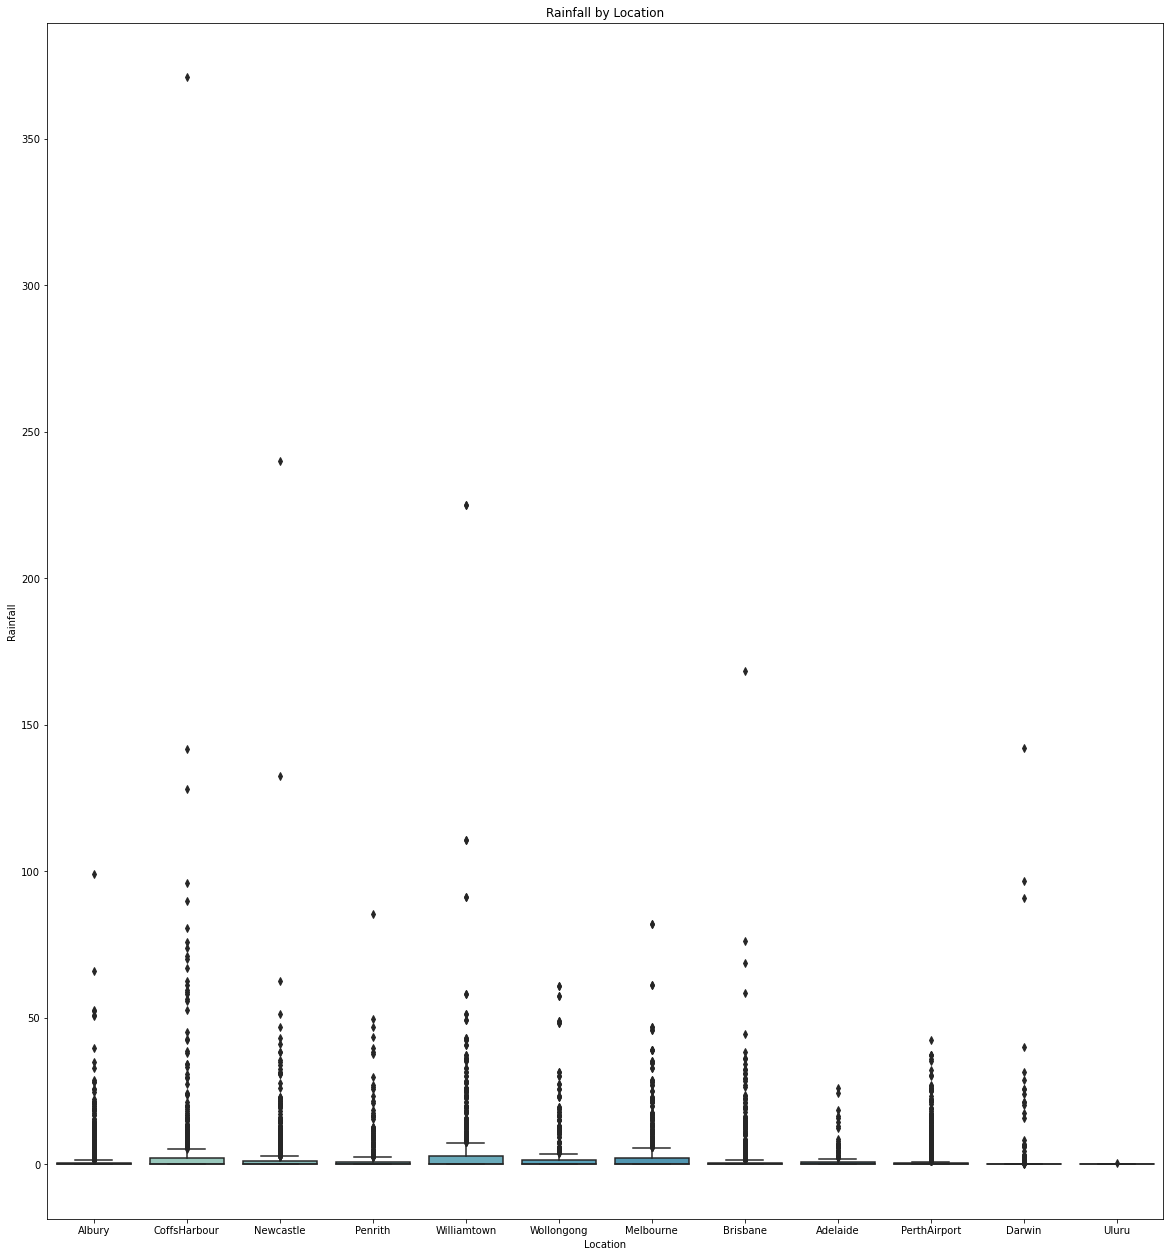

In [17]:
# Checking Rainfall by each loaction.

plt.figure(figsize=(20,22))
sns.boxplot(x='Location',y='Rainfall',data=Rainfall_DF,palette = 'GnBu_d').set_title('Rainfall by Location')

Here I found below points:

Rainfall is low in Uluru and Adelaide.

There are some outliers which plotted above 150.

In [18]:
# Grouping all location rainfall values.

Rainfall_DF.groupby('Location',as_index = False)['Rainfall'].mean()

,Location,Rainfall
0,Adelaide,1.407960
1,Albury,2.122272
2,Brisbane,3.112544
3,CoffsHarbour,5.439016
4,Darwin,2.735200
5,Melbourne,2.274567
6,Newcastle,3.032921
7,Penrith,2.358664
8,PerthAirport,1.916279
9,Uluru,0.010256


In [19]:
#Checking the RainTomorrow by grouping RainToday and Raintomorrow.

rain_today_tommorow = Rainfall_DF.groupby(['RainToday','RainTomorrow']).apply(lambda Rainfall_DF: round(Rainfall_DF['RainTomorrow'].count(), 0))
print(rain_today_tommorow)

RainToday  RainTomorrow
No         No              5390
           Yes             1045
Yes        No              1044
           Yes              946
dtype: int64


# checking the percentage of Raintoday and RainTomorrow

In [20]:
print('If rain today then chance will Rain Tomorrow', (946*100)/(1044+946))
print('if Rain today then less chances of Rain tomorrow',(1044*100)/(1044+946))
print('If Rain not today then chances of Rain Tomorrow',(1045*100)/(1045+5390))
print('If Rain not today then chances of no Rain Tomorrow also',(5390*100)/(1045+5390))

If rain today then chance will Rain Tomorrow 47.537688442211056
if Rain today then less chances of Rain tomorrow 52.462311557788944
If Rain not today then chances of Rain Tomorrow 16.23931623931624
If Rain not today then chances of no Rain Tomorrow also 83.76068376068376


# Now I have to work on Data column, sperating the Year and Month column

In [21]:
Rainfall_DF['Date'] = pd.to_datetime(Rainfall_DF['Date'])

In [22]:
Rainfall_DF['Year'] = pd.DatetimeIndex(Rainfall_DF['Date']).year
Rainfall_DF['Month'] = pd.DatetimeIndex(Rainfall_DF['Date']).month

In [23]:
# Dropping Date column as i have seprated Year and Month
Rainfall_DF.drop(columns='Date',inplace=True)

In [24]:
Rainfall_DF.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,Albury,13.4,22.9,0.6,5.389395,7.775937,W,44.0,W,WNW,...,1007.7,1007.1,8.000000,5.334247,16.9,21.8,No,No,2008,12
1,Albury,7.4,25.1,0.0,5.389395,7.775937,WNW,44.0,NNW,WSW,...,1010.6,1007.8,6.373961,5.334247,17.2,24.3,No,No,2008,12
2,Albury,12.9,25.7,0.0,5.389395,7.775937,WSW,46.0,W,WSW,...,1007.6,1008.7,6.373961,2.000000,21.0,23.2,No,No,2008,12
3,Albury,9.2,28.0,0.0,5.389395,7.775937,NE,24.0,SE,E,...,1017.6,1012.8,6.373961,5.334247,18.1,26.5,No,No,2008,12
4,Albury,17.5,32.3,1.0,5.389395,7.775937,W,41.0,ENE,NW,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No,2008,12
5,Albury,14.6,29.7,0.2,5.389395,7.775937,WNW,56.0,W,W,...,1009.2,1005.4,6.373961,5.334247,20.6,28.9,No,No,2008,12
6,Albury,14.3,25.0,0.0,5.389395,7.775937,W,50.0,SW,W,...,1009.6,1008.2,1.000000,5.334247,18.1,24.6,No,No,2008,12
7,Albury,7.7,26.7,0.0,5.389395,7.775937,W,35.0,SSE,W,...,1013.4,1010.1,6.373961,5.334247,16.3,25.5,No,No,2008,12
8,Albury,9.7,31.9,0.0,5.389395,7.775937,NNW,80.0,SE,NW,...,1008.9,1003.6,6.373961,5.334247,18.3,30.2,No,Yes,2008,12
9,Albury,13.1,30.1,1.4,5.389395,7.775937,W,28.0,S,SSE,...,1007.0,1005.7,6.373961,5.334247,20.1,28.2,Yes,No,2008,12


<AxesSubplot:xlabel='WindGustDir', ylabel='Rainfall'>

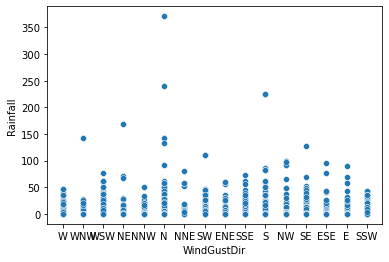

In [25]:
# checking "WindGustDir" vs "Rainfall"

sns.scatterplot(x='WindGustDir',y='Rainfall',data=Rainfall_DF)

It is observed that when wind direction is of N or NE or NW,,chances for Rain Increase

<AxesSubplot:xlabel='Pressure3pm', ylabel='Pressure9am'>

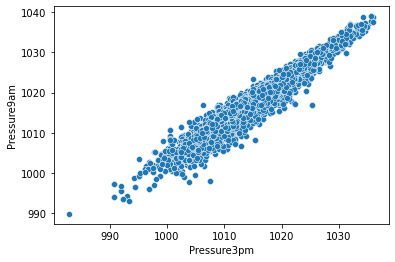

In [26]:
# checking 'Pressure3pm' vs 'Pressure9am'

sns.scatterplot(x='Pressure3pm',y='Pressure9am',data=Rainfall_DF)

<AxesSubplot:xlabel='Temp3pm', ylabel='Temp9am'>

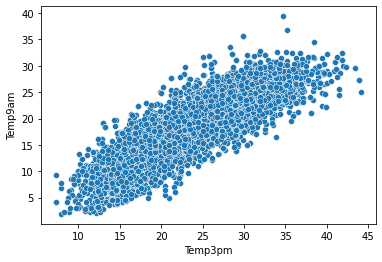

In [27]:
# checking 'Temp3pm' vs 'Temp9pm'

sns.scatterplot(x='Temp3pm',y='Temp9am',data=Rainfall_DF)

<AxesSubplot:xlabel='Year', ylabel='Rainfall'>

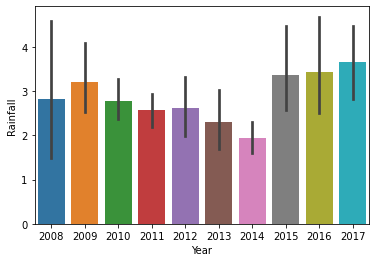

In [28]:
# Comparing with "Year" vs "Rainfall"

sns.barplot(x='Year',y='Rainfall',data=Rainfall_DF)

As per the above graphs it is observed that since last 3 years Rain increased.

<AxesSubplot:xlabel='Month', ylabel='Rainfall'>

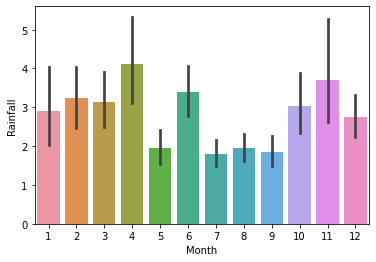

In [29]:
# Comparing with "Year" vs "Rainfall"

sns.barplot(x='Month',y='Rainfall',data=Rainfall_DF)

It can observed that in the month of Feb,March,April and Oct,Nov,Dec is highly rainy month.

In [30]:
# checking Data Types

Rainfall_DF.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
Year               int64
Month              int64
dtype: object

In [31]:
from sklearn.preprocessing import LabelEncoder

lb= LabelEncoder()
Rainfall_DF['Location'] = lb.fit_transform(Rainfall_DF['Location'])
Rainfall_DF['WindGustDir'] = lb.fit_transform(Rainfall_DF['WindGustDir'])
Rainfall_DF['WindDir9am'] = lb.fit_transform(Rainfall_DF['WindDir9am'])
Rainfall_DF['WindDir3pm'] = lb.fit_transform(Rainfall_DF['WindDir3pm'])
Rainfall_DF['RainToday'] = lb.fit_transform(Rainfall_DF['RainToday'])
Rainfall_DF['RainTomorrow'] = lb.fit_transform(Rainfall_DF['RainTomorrow'])
Rainfall_DF.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,13.4,22.9,0.6,5.389395,7.775937,13,44.0,13,14,...,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0,0,2008,12
1,1,7.4,25.1,0.0,5.389395,7.775937,14,44.0,6,15,...,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0,0,2008,12
2,1,12.9,25.7,0.0,5.389395,7.775937,15,46.0,13,15,...,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0,0,2008,12
3,1,9.2,28.0,0.0,5.389395,7.775937,4,24.0,9,0,...,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0,0,2008,12
4,1,17.5,32.3,1.0,5.389395,7.775937,13,41.0,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12


In [32]:
# checking correlation

Rainfall_corr = Rainfall_DF.corr()
Rainfall_corr

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
Location,1.000000,0.117658,0.063950,0.009082,0.143519,0.096867,-0.035408,0.231396,-0.027103,-0.027736,...,-0.032347,-0.020628,0.036761,0.021110,0.118159,0.060091,0.003071,0.002824,0.486405,-0.082407
MinTemp,0.117658,1.000000,0.717377,0.088188,0.254919,0.056022,-0.144942,0.230338,-0.041756,-0.147219,...,-0.429741,-0.423414,0.060092,0.023926,0.887110,0.685502,0.064728,0.092681,0.043584,-0.245261
MaxTemp,0.063950,0.717377,1.000000,-0.086429,0.322397,0.378601,-0.224175,0.139989,-0.213949,-0.180739,...,-0.325585,-0.403137,-0.242983,-0.250770,0.865968,0.974653,-0.224639,-0.152636,0.120043,-0.163388
Rainfall,0.009082,0.088188,-0.086429,1.000000,0.023753,-0.168097,0.038347,0.086048,0.093876,0.038014,...,-0.072957,-0.034036,0.162338,0.140072,-0.006062,-0.089678,0.461096,0.219816,0.007776,-0.011642
Evaporation,0.143519,0.254919,0.322397,0.023753,1.000000,0.234124,-0.078765,0.136371,-0.061677,-0.047952,...,-0.177777,-0.189551,-0.057034,-0.105322,0.305297,0.315057,-0.088654,-0.059012,0.152708,0.004362
Sunshine,0.096867,0.056022,0.378601,-0.168097,0.234124,1.000000,-0.100163,-0.012662,-0.067482,-0.069609,...,0.022603,-0.035718,-0.502975,-0.535503,0.251401,0.395929,-0.232497,-0.325724,0.119362,-0.008902
WindGustDir,-0.035408,-0.144942,-0.224175,0.038347,-0.078765,-0.100163,1.000000,0.016591,0.403562,0.505799,...,-0.109683,-0.025048,0.150686,0.107775,-0.176188,-0.238385,0.125188,0.051832,-0.088340,0.034823
WindGustSpeed,0.231396,0.230338,0.139989,0.086048,0.136371,-0.012662,0.016591,1.000000,-0.072058,0.071235,...,-0.407115,-0.372632,0.014176,0.075081,0.202391,0.102125,0.076822,0.190127,-0.042402,0.051968
WindDir9am,-0.027103,-0.041756,-0.213949,0.093876,-0.061677,-0.067482,0.403562,-0.072058,1.000000,0.249527,...,-0.011035,0.073507,0.103041,0.069026,-0.103020,-0.221617,0.157324,0.032860,-0.014498,0.012544
WindDir3pm,-0.027736,-0.147219,-0.180739,0.038014,-0.047952,-0.069609,0.505799,0.071235,0.249527,1.000000,...,-0.136567,-0.043662,0.080342,0.054408,-0.165238,-0.194725,0.100125,0.008918,-0.005812,0.029384


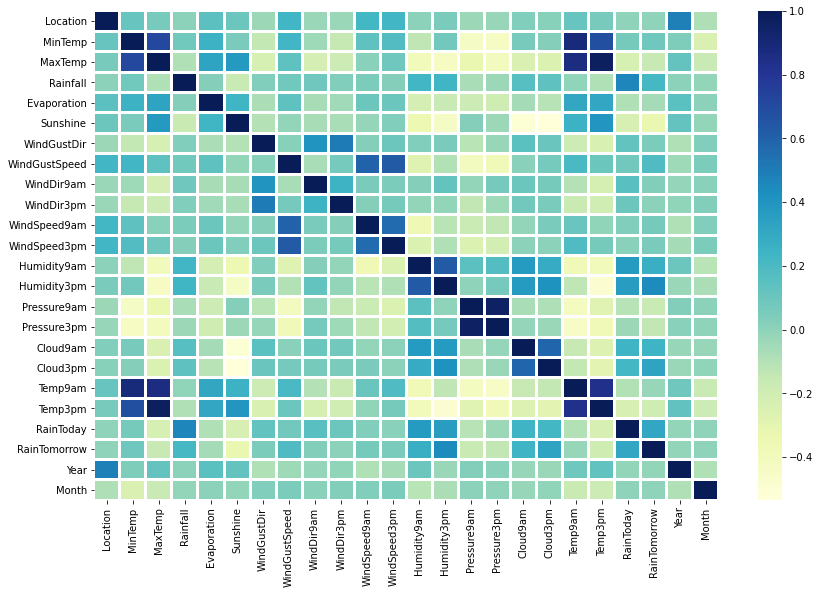

In [33]:
plt.figure(figsize=(14,9))
sns.heatmap(Rainfall_corr,vmax=1,linewidth = 2,cmap='YlGnBu')
plt.show()

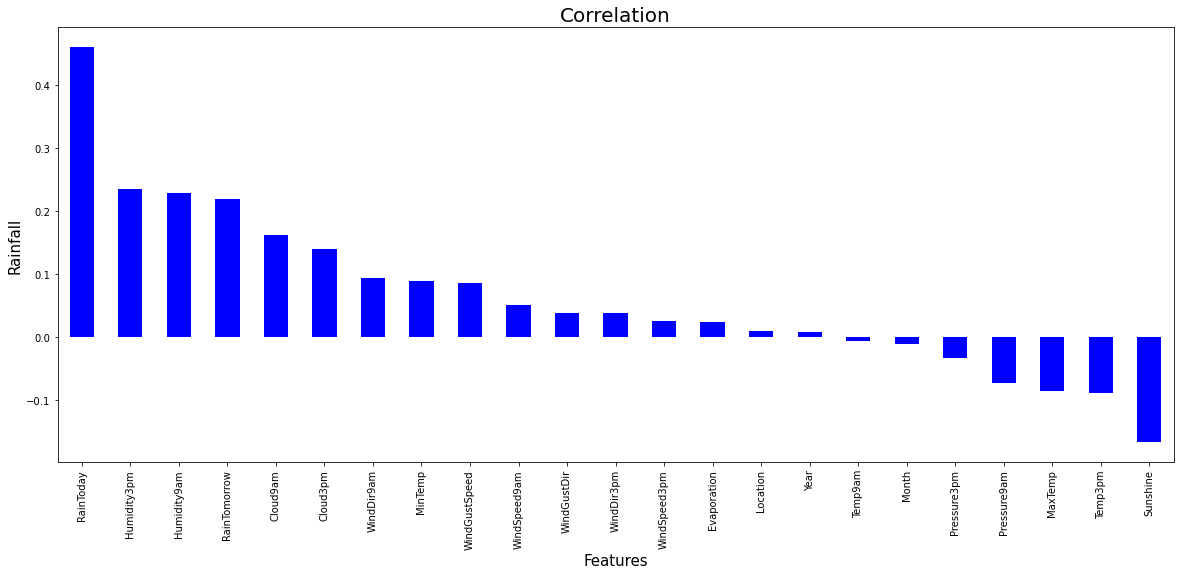

In [34]:
plt.figure(figsize = (20,8))
Rainfall_DF.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind = 'bar',color = 'b')
plt.xlabel('Features', fontsize = 15)
plt.ylabel('Rainfall', fontsize = 15)
plt.title('Correlation', fontsize = 20)
plt.show()

# Visualising data distribution for every column

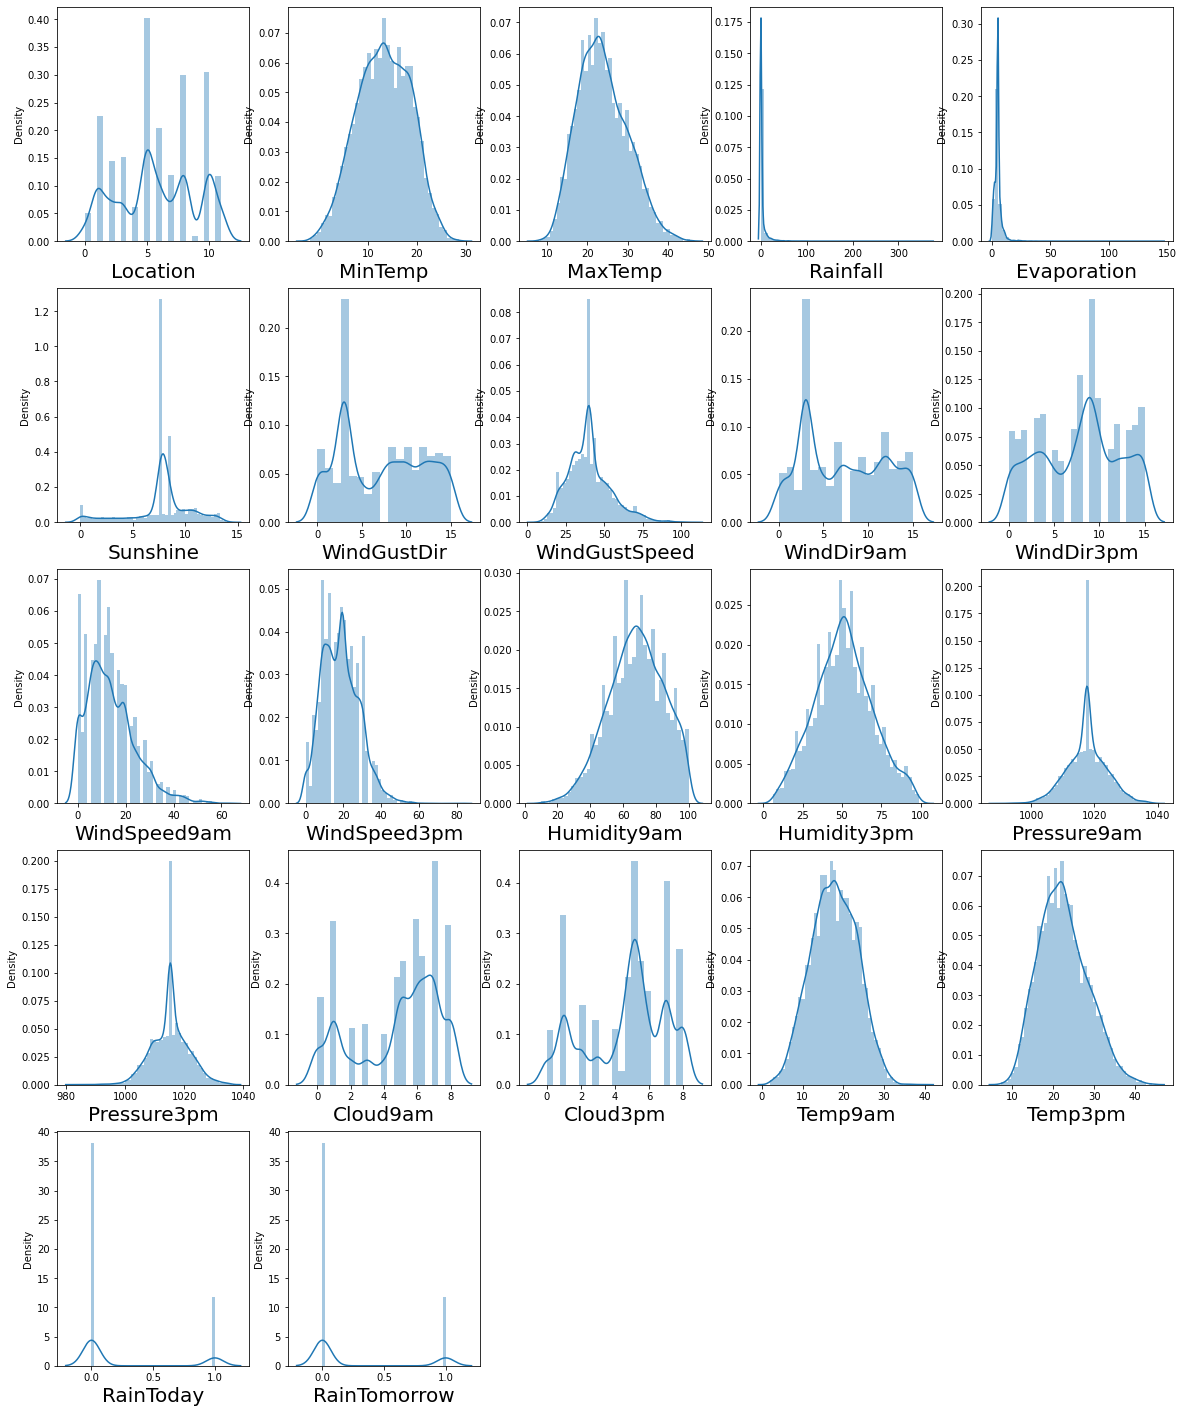

In [35]:
plt.figure(figsize=(20,25),facecolor = 'white')
plotnum=1

for col in Rainfall_DF.drop(columns = ['Year','Month'],axis=1):
    if plotnum<=24:
        plt.subplot(5,5,plotnum)
        sns.distplot(Rainfall_DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

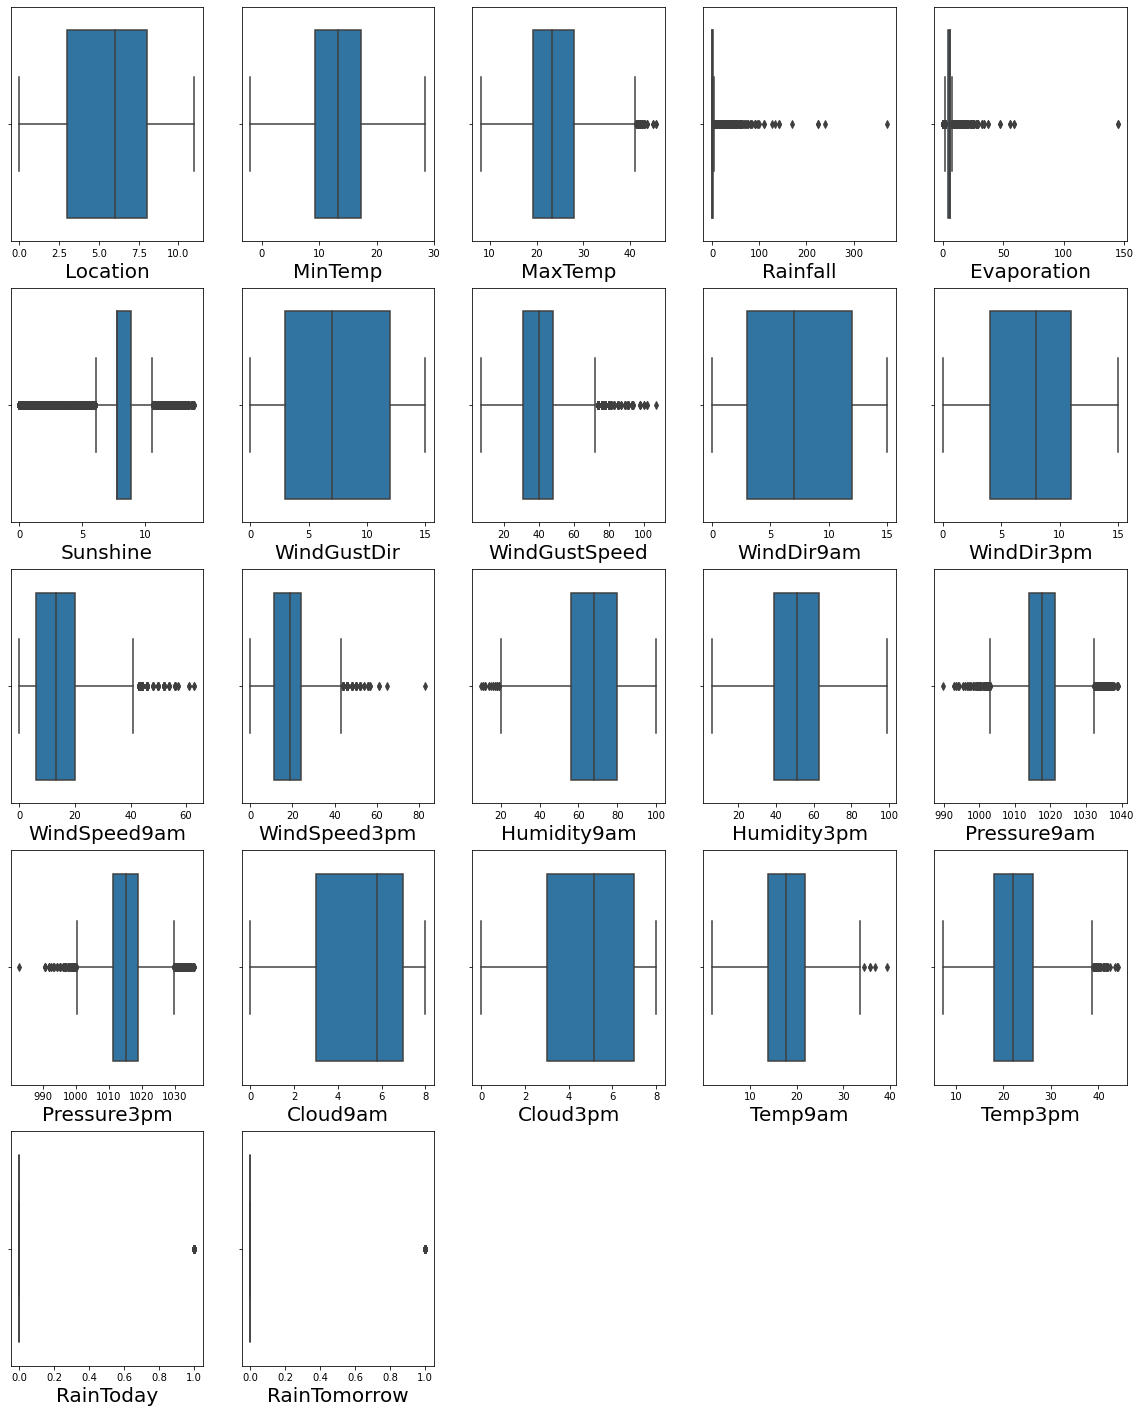

In [36]:
# Checking for Outliers

plt.figure(figsize = (20,25), facecolor = 'white')
plotnum = 1

for col in Rainfall_DF.drop(columns = ['Year','Month'],axis=1):
    if plotnum<=24:
        plt.subplot(5,5,plotnum)
        sns.boxplot(Rainfall_DF[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

With the help of Boxplot it is clearly indicating that Maxtemp,Rainfall,Evaporation,Sunshine,SindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Pressure9am,Pressure3pm,Temp9am,Temp3pm has some amount of outliers

# Removing Outliers using Zscore method

In [37]:
from scipy.stats import zscore

zscore = zscore(Rainfall_DF)
z_score_abs = np.abs(zscore)

df1 = Rainfall_DF[(z_score_abs <3).all(axis=1)] #taking 3 as threshold value

In [38]:
df1.shape

(7987, 24)

In [39]:
Rainfall_DF.shape

(8425, 24)

In [40]:
# checking data loss %

loss = (8425-7987)/8425*100
loss

5.198813056379822

5.19% is in acceptable range

In [41]:
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,13.4,22.900000,0.6,5.389395,7.775937,13,44.000000,13,14,...,1007.7,1007.1,8.000000,5.334247,16.9,21.8,0,0,2008,12
1,1,7.4,25.100000,0.0,5.389395,7.775937,14,44.000000,6,15,...,1010.6,1007.8,6.373961,5.334247,17.2,24.3,0,0,2008,12
2,1,12.9,25.700000,0.0,5.389395,7.775937,15,46.000000,13,15,...,1007.6,1008.7,6.373961,2.000000,21.0,23.2,0,0,2008,12
3,1,9.2,28.000000,0.0,5.389395,7.775937,4,24.000000,9,0,...,1017.6,1012.8,6.373961,5.334247,18.1,26.5,0,0,2008,12
4,1,17.5,32.300000,1.0,5.389395,7.775937,13,41.000000,1,7,...,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0,2008,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.0,5.389395,7.775937,0,31.000000,9,1,...,1024.6,1020.3,6.000000,5.285714,10.1,22.4,0,0,2017,6
8421,9,3.6,25.300000,0.0,5.389395,7.775937,6,22.000000,9,3,...,1023.5,1019.1,6.000000,5.285714,10.9,24.5,0,0,2017,6
8422,9,5.4,26.900000,0.0,5.389395,7.775937,3,37.000000,9,14,...,1021.0,1016.8,6.000000,5.285714,12.5,26.1,0,0,2017,6
8423,9,7.8,27.000000,0.0,5.389395,7.775937,9,28.000000,10,3,...,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0,0,2017,6


# Reducing the Skewness

In [42]:
#remove skewness using cuberoot and power transformation

from scipy.stats import boxcox

for col in df1:
    if df1[col].skew()>=0.50:
        df1[col]=np.cbrt(df1[col]) 
    if df1[col].skew()<= -0.50:
        df1[col]=np.power(df1[col],2)

In [43]:
df1.skew()

Location        -0.040284
MinTemp         -0.083896
MaxTemp          0.316156
Rainfall         1.321362
Evaporation      0.029407
Sunshine         0.627712
WindGustDir      0.112339
WindGustSpeed   -0.180704
WindDir9am       0.160081
WindDir3pm      -0.126255
WindSpeed9am     0.008991
WindSpeed3pm     0.316667
Humidity9am     -0.231656
Humidity3pm      0.125150
Pressure9am      0.020747
Pressure3pm      0.044522
Cloud9am         0.005248
Cloud3pm        -0.473623
Temp9am         -0.037199
Temp3pm          0.335763
RainToday        1.301170
RainTomorrow     1.296077
Year             0.430100
Month            0.054460
dtype: float64

In [44]:
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
0,1,13.4,22.9,0.843433,3.073926,60.465191,13,3.530348,13,14,...,1007.7,1007.1,64.000000,5.334247,16.9,21.8,0.0,0.0,2008,12
1,1,7.4,25.1,0.000000,3.073926,60.465191,14,3.530348,6,15,...,1010.6,1007.8,40.627382,5.334247,17.2,24.3,0.0,0.0,2008,12
2,1,12.9,25.7,0.000000,3.073926,60.465191,15,3.583048,13,15,...,1007.6,1008.7,40.627382,2.000000,21.0,23.2,0.0,0.0,2008,12
3,1,9.2,28.0,0.000000,3.073926,60.465191,4,2.884499,9,0,...,1017.6,1012.8,40.627382,5.334247,18.1,26.5,0.0,0.0,2008,12
4,1,17.5,32.3,1.000000,3.073926,60.465191,13,3.448217,1,7,...,1010.8,1006.0,49.000000,8.000000,17.8,29.7,0.0,0.0,2008,12


In [45]:
df2 = df1.copy()

In [46]:
df1.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month
count,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,...,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000,7987.000000
mean,5.754977,13.095138,23.771544,0.535882,2.903628,68.895398,7.220483,3.360043,7.272818,7.814824,...,1017.794130,1015.385641,29.730064,4.647940,17.667886,22.372094,0.227369,0.228121,2012.079129,6.422311
std,3.152472,5.383047,6.004965,0.815259,0.908141,39.053695,4.701891,0.375325,4.581134,4.417583,...,5.983400,5.926195,20.888057,2.323176,5.572161,5.837305,0.419159,0.419647,2.455514,3.413497
min,0.000000,-2.000000,8.200000,0.000000,0.000000,0.000000,0.000000,1.912931,0.000000,0.000000,...,999.000000,996.700000,0.000000,0.000000,1.900000,7.300000,0.000000,0.000000,2008.000000,1.000000
25%,3.000000,9.100000,19.300000,0.000000,2.435131,60.465191,3.000000,3.141381,3.000000,4.000000,...,1014.200000,1011.700000,9.000000,3.000000,13.700000,18.100000,0.000000,0.000000,2010.000000,3.000000
50%,6.000000,13.100000,23.300000,0.000000,3.073926,60.465191,7.000000,3.391211,7.000000,8.000000,...,1017.640209,1015.236740,33.365824,5.154047,17.700000,22.000000,0.000000,0.000000,2011.000000,6.000000
75%,8.000000,17.200000,27.900000,1.062659,3.073926,81.000000,12.000000,3.583048,12.000000,11.000000,...,1021.400000,1018.900000,49.000000,6.000000,21.800000,26.200000,0.000000,0.000000,2014.000000,9.000000
max,11.000000,28.300000,42.000000,3.220442,6.507368,193.210000,15.000000,4.326749,15.000000,15.000000,...,1036.300000,1033.800000,64.000000,8.000000,34.500000,40.100000,1.000000,1.000000,2017.000000,12.000000


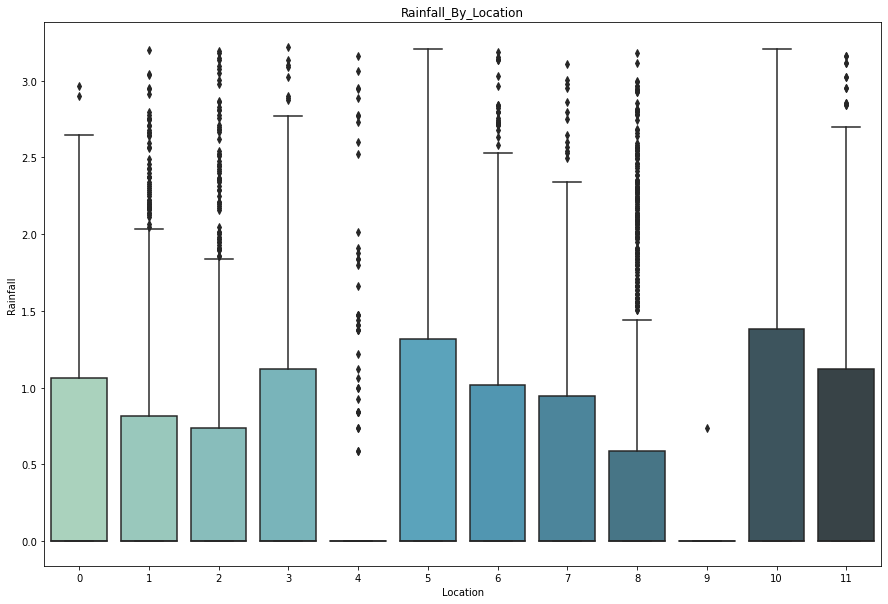

In [47]:
plt.figure(figsize = (15,10))
sns.boxplot(x = 'Location', y = 'Rainfall', data = df1, palette= 'GnBu_d').set_title('Rainfall_By_Location')
plt.show()

In [48]:
x =df1.drop('RainTomorrow',axis=1)
y =df1['RainTomorrow']

# Feature Selection

In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler_x = scaler.fit_transform(x)

# Classification model building

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [52]:
from sklearn.ensemble import RandomForestClassifier

maxAcc = 0
maxRS = 0

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(scaler_x,y,test_size = .31,random_state = i)
    modRF = RandomForestClassifier()
    modRF.fit(x_train,y_train)
    pred = modRF.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
        
print(f"Best accuracy is: {maxAcc} on Random State: {maxRS}")

Best accuracy is: 0.9050888529886915 on Random State: 4


In [54]:
x_train,x_test,y_train,y_test = train_test_split(scaler_x,y,test_size=.31,random_state=4)

In [55]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve

In [56]:
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [57]:
RFC = RandomForestClassifier()
XGBC = XGBClassifier()
adbc = AdaBoostClassifier()
LOGR = LogisticRegression(solver='liblinear')
SV = SVC(probability = True)
KNN = KNeighborsClassifier()

# Training the model

In [58]:
RFC.fit(x_train,y_train.ravel())
XGBC.fit(x_train,y_train.ravel())
adbc.fit(x_train,y_train.ravel())
LOGR.fit(x_train,y_train.ravel())
SV.fit(x_train,y_train.ravel())
KNN.fit(x_train,y_train.ravel())

[01:09:35] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier()

# Logistic Regression Model Accuracy

In [60]:
LOGRpred = LOGR.predict(x_test)
accu = classification_report(y_test,LOGRpred)

In [61]:
conf_matrx = confusion_matrix(y_test,LOGRpred)
conf_matrx

array([[1827,  101],
       [ 273,  275]], dtype=int64)

In [62]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      1928
         1.0       0.73      0.50      0.60       548

    accuracy                           0.85      2476
   macro avg       0.80      0.72      0.75      2476
weighted avg       0.84      0.85      0.84      2476



# Random Forest Classifier Model

In [63]:
RFCpred = RFC.predict(x_test)
accu = classification_report(y_test,RFCpred)

In [64]:
conf_matrx = confusion_matrix(y_test,RFCpred)
conf_matrx

array([[1879,   49],
       [ 189,  359]], dtype=int64)

In [65]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1928
         1.0       0.88      0.66      0.75       548

    accuracy                           0.90      2476
   macro avg       0.89      0.81      0.85      2476
weighted avg       0.90      0.90      0.90      2476



# XGB Classifier Model

In [66]:
XGBCpred = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCpred)

In [67]:
conf_matrx = confusion_matrix(y_test,XGBCpred)
conf_matrx

array([[1845,   83],
       [ 164,  384]], dtype=int64)

In [68]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.92      0.96      0.94      1928
         1.0       0.82      0.70      0.76       548

    accuracy                           0.90      2476
   macro avg       0.87      0.83      0.85      2476
weighted avg       0.90      0.90      0.90      2476



# AdaBoost Classifier Model

In [69]:
adbcpred = adbc.predict(x_test)
accu = classification_report(y_test,adbcpred)

In [70]:
conf_matrx = confusion_matrix(y_test,adbcpred)
conf_matrx

array([[1812,  116],
       [ 263,  285]], dtype=int64)

In [71]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1928
         1.0       0.71      0.52      0.60       548

    accuracy                           0.85      2476
   macro avg       0.79      0.73      0.75      2476
weighted avg       0.84      0.85      0.84      2476



# SV Classifier Model Accuracy

In [72]:
SVpred = SV.predict(x_test)
accu = classification_report(y_test,SVpred)
conf_matrx = confusion_matrix(y_test,SVpred)
conf_matrx

array([[1852,   76],
       [ 265,  283]], dtype=int64)

In [73]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1928
         1.0       0.79      0.52      0.62       548

    accuracy                           0.86      2476
   macro avg       0.83      0.74      0.77      2476
weighted avg       0.86      0.86      0.85      2476



# KNN Classifier Model Accuracy

In [75]:
KNNpred = KNN.predict(x_test)
accu = classification_report(y_test,KNNpred)
conf_matrx = confusion_matrix(y_test,KNNpred)
conf_matrx

array([[1798,  130],
       [ 283,  265]], dtype=int64)

In [76]:
print(accu)

              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      1928
         1.0       0.67      0.48      0.56       548

    accuracy                           0.83      2476
   macro avg       0.77      0.71      0.73      2476
weighted avg       0.82      0.83      0.82      2476



# Model Cross VAlidation

In [77]:
from sklearn.model_selection import cross_val_score as cvs

# Logistic Regression

In [80]:
print(cvs(LOGR,scaler_x,y,cv=5).mean())

0.8239639718715395


# Random Forest Classifier

In [81]:
print(cvs(RFC,scaler_x,y,cv=5).mean())

0.846750203565352


# XGB Classifier Model

In [82]:
print(cvs(XGBC,scaler_x,y,cv=5).mean())

[01:18:03] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[01:18:04] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# AdaBoost Classifier

In [83]:
print(cvs(adbc,scaler_x,y,cv=5).mean())

0.8060574308994571


# SV Classifier

In [84]:
print(cvs(SV,scaler_x,y,cv=5).mean())

0.8260920232946161


# KNN Classifier

In [86]:
print(cvs(KNN,scaler_x,y,cv=5).mean())

0.7992989044696603


# Based on comparing accuracy score results, with cross validation results. It is determined that RandomForest Classifier is the best model.

# ROC AUC Scores

# Logistic Regression

In [92]:
roc_auc_score(y_test,LOGRpred)

0.7247194627010328

SV Classifier

In [94]:
roc_auc_score(y_test,SVpred)

0.7385021352636519

Random Forest Classifier

In [95]:
roc_auc_score(y_test,RFCpred)

0.8148472756458794

XGB Classifier

In [96]:
roc_auc_score(y_test,XGBCpred)

0.8288400672380896

Ada Boost Classifier

In [97]:
roc_auc_score(y_test,adbcpred)

0.7299535087984977

KNN Classifier

In [98]:
roc_auc_score(y_test,KNNpred)

0.7080746282218251

# ROC AUC Curves

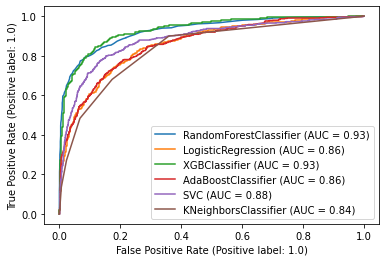

In [99]:
disp = plot_roc_curve(RFC,x_test,y_test)
mod = [LOGR,XGBC,adbc,SV,KNN]

for i in mod:
    plot_roc_curve(i,x_test,y_test, ax = disp.ax_)
    plt.legend(prop={'size':10}, loc = 'lower right')
plt.show()

Based on above graph and roc_auc_scores, XGB Classifier is the best model for the dataset, with AUC = 0.93 and roc_auc_score = 0.82

# Hyper Parameter Tunning

XGB Classifier

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
parameter = {'booster':["gbtree","gblinear"],'eta':[0.01,0.1,0.2,0.3],'min_child_weight':np.arange(5),'max_depth':[10,20,40,60,80],'subsample':[0.5,1]}

In [102]:
GridCV = GridSearchCV(XGBClassifier(),parameter,cv=5,n_jobs=-1,verbose=1)

In [103]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits
[01:47:26] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,...
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_

In [104]:
GridCV.best_params_

{'booster': 'gbtree',
 'eta': 0.1,
 'max_depth': 10,
 'min_child_weight': 1,
 'subsample': 0.5}

In [105]:
Best_mod = XGBClassifier(booster = 'gbtree',eta=0.1, max_depth = 10, min_child_weight=1,subsample=0.5)
Best_mod.fit(x_train,y_train)

[01:49:24] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.100000001,
              max_delta_step=0, max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [106]:
xgbpred = Best_mod.predict(x_test)
acc = accuracy_score(y_test,xgbpred)
print(acc*100)

89.74151857835218


# XGB Classifier has accuracy 89.74%

# Hyper Tunning of Random Forest Classifier Model

In [110]:
parameter = {'n_estimators':[30,60],'max_depth':[10,20,40],'min_samples_leaf':[5,10,20],'min_samples_split':[5,10],'bootstrap':[True,False],'max_features':["auto","sqrt","log2"]}

In [111]:
GridCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs=-1,verbose=1)

In [112]:
GridCV.fit(x_train,y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [10, 20, 40],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [5, 10, 20],
                         'min_samples_split': [5, 10],
                         'n_estimators': [30, 60]},
             verbose=1)

In [113]:
GridCV.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 60}

In [114]:
Best_mod1 = RandomForestClassifier(n_estimators = 60,bootstrap = False,max_depth = 20,max_features = 'sqrt',min_samples_leaf = 5,min_samples_split = 5)
Best_mod1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       n_estimators=60)

In [115]:
RFCpred = Best_mod1.predict(x_test)
acc = accuracy_score(y_test,RFCpred)
print(acc*100)

89.8626817447496


We can use anyone model as both "XGB Classifier" and "Random Forest Classifier" model has almost same accuracy score.

So I am going to use XGB Classifier Model for prediction.

# Saving the model

In [116]:
import joblib
joblib.dump(Best_mod,"BestModelRainfallprediction.pkl")

['BestModelRainfallprediction.pkl']

# Loading the model

In [117]:
mod = joblib.load("BestModelRainfallprediction.pkl")

In [118]:
print(mod.predict(x_test))

[1. 0. 0. ... 0. 0. 1.]


In [119]:
Prediction_accuracy = pd.DataFrame({'Prediction':mod.predict(x_test), 'Actual Values': y_test})
Prediction_accuracy.head(50)

,Prediction,Actual Values
983,1.0,0.0
3945,0.0,0.0
3146,0.0,0.0
3620,1.0,1.0
4439,0.0,0.0
2374,0.0,0.0
1326,0.0,1.0
1748,0.0,0.0
4542,0.0,0.0
2556,1.0,1.0
